In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import PIL
from PIL import Image, ImageDraw,ImageOps
from keras.preprocessing import image
import cv2

(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

In [2]:
print(train_images.shape, " , ", train_images.dtype)
print(test_images.shape, " , ", test_images.dtype)

(60000, 28, 28)  ,  uint8
(10000, 28, 28)  ,  uint8


In [4]:
#reshape to have single color channel
train_images_gr=train_images.reshape(train_images.shape[0],28,28,1)
test_images_gr=test_images.reshape(test_images.shape[0],28,28,1)

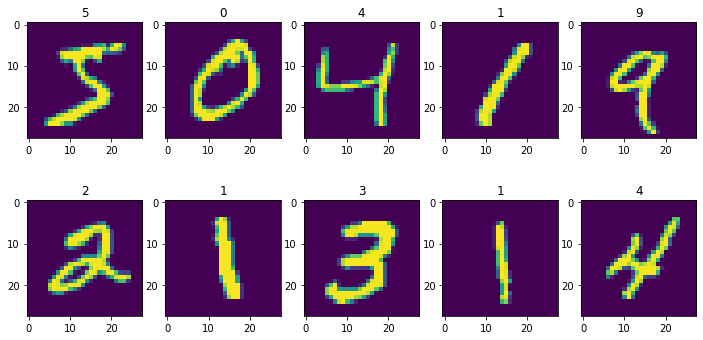

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
c = 0
for i in range(10):
    idx = i // 5
    idy = i % 5 
    ax[idx, idy].imshow(train_images_gr[i].reshape(28,28))
    ax[idx, idy].set_title(train_labels[i])

In [8]:
input_shape=(28,28,1)
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 activation='relu',
                                 padding='valid',
                                 input_shape=input_shape))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 activation='relu',
                                 padding='same',
                                 input_shape=input_shape))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

In [10]:
epochs=100
train_images_scaled=train_images_gr/255.
es_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3,
                                              restore_best_weights=True,
                                              verbose=1
                                              )
history=model.fit(train_images_scaled,train_labels,
                  batch_size=32,
                  callbacks=[es_callbacks],
                  validation_split=0.1,
                  epochs=epochs,
                  verbose=1)

Epoch 1/100
1688/1688 [==============================] - 42s 24ms/step - loss: 0.1943 - accuracy: 0.9396 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 2/100
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0683 - accuracy: 0.9801 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 3/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0471 - accuracy: 0.9865 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 4/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0378 - accuracy: 0.9889 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 5/100
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0465 - val_accuracy: 0.9887
Epoch 6/100
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0327 - val_accuracy: 0.9905
Epoch 7/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0

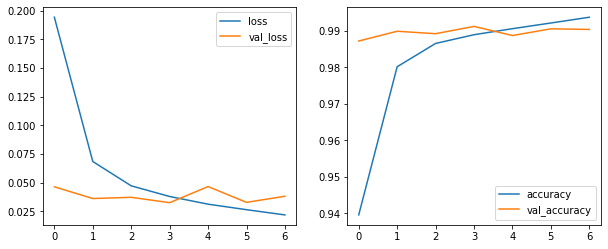

In [11]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [12]:
model.save('mnist_9912.h5')

In [ ]:
test_images_scaled = test_images_gr / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

In [14]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([7, 2, 1, 0, 4])

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
class_names=["0","1","2","3","4","5","6","7","8","9"]
print(classification_report(test_labels, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



,0,1,2,3,4,5,6,7,8,9
0,978,0,0,0,0,0,0,1,1,0
1,0,1124,1,2,0,1,4,2,1,0
2,4,0,1021,0,0,0,0,6,1,0
3,0,0,1,997,0,10,0,0,2,0
4,0,0,0,0,971,0,5,0,0,6
5,2,0,0,1,0,884,2,1,1,1
6,7,1,0,0,1,4,943,0,2,0
7,1,0,7,0,0,1,0,1019,0,0
8,4,0,3,2,0,0,1,1,962,1
9,0,1,0,0,5,6,0,6,6,985


In [17]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


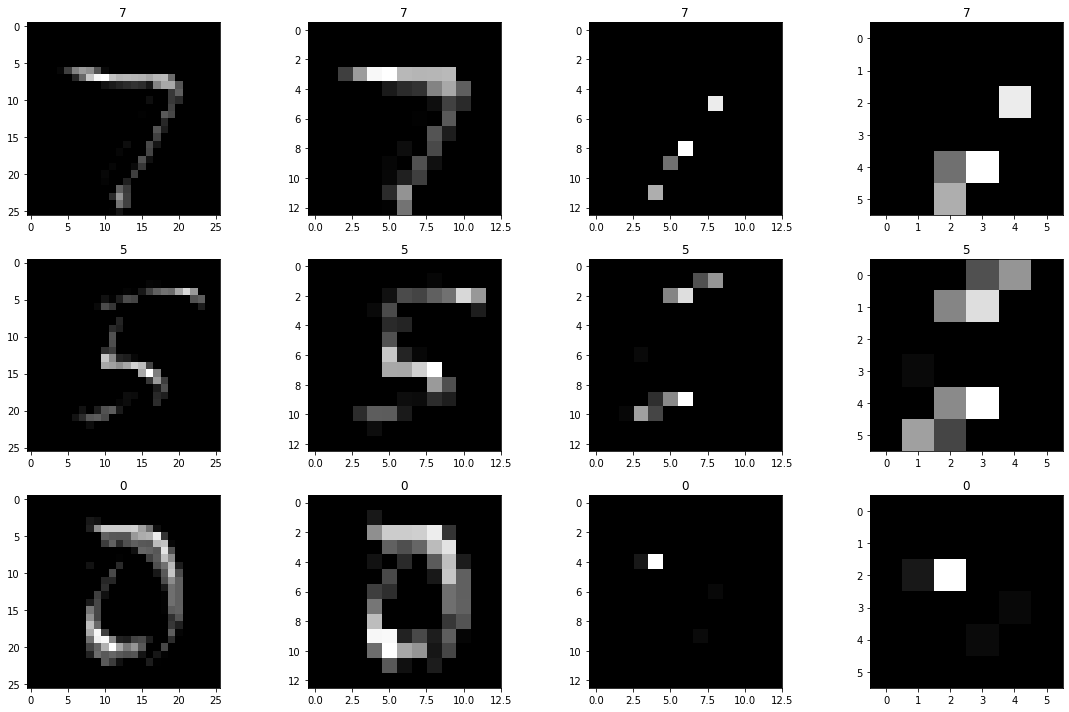

In [144]:
#to see how our model sees an image in between (like edges/curves/lines)

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)


f, axarr = plt.subplots(3,4, figsize=(16, 10))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 13

for x in range(0,4):
  f1 = activation_model.predict(test_images_scaled[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(class_names[test_labels[FIRST_IMAGE]])
  f2 = activation_model.predict(test_images_scaled[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[1,x].grid(False)
  axarr[1,x].set_title(class_names[test_labels[SECOND_IMAGE]])
  f3 = activation_model.predict(test_images_scaled[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='binary_r')
  axarr[2,x].grid(False)
  axarr[2,x].set_title(class_names[test_labels[THIRD_IMAGE]])
plt.tight_layout()

#see how our model sees an image initially by identifying edges and color blob and layer by layer learning to recognise line and curves and identifying any digit

In [ ]:
#predicting on new image sets

In [111]:
model.save('mnist_99_12.h5')

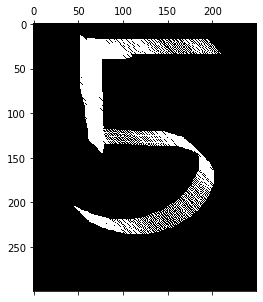

In [112]:
image=Image.open('/content/image_0.png')
x=np.asarray(image)

plt.matshow(x)
resized_x=cv2.resize(x,(28,28))
gray=cv2.cvtColor(resized_x,cv2.COLOR_BGR2GRAY)

In [140]:
gray=gray.reshape(1,28,28,1)
predicted=model.predict(gray)
predicted_newsize=predicted[0]

In [141]:
predicted.shape
predicted_newsize.shape

(10,)

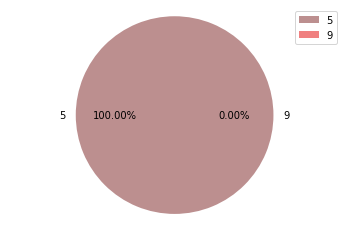

In [142]:
import collections

fig1,ax1=plt.subplots()
labels=[0,1,2,3,4,5,6,7,8,9]
b=dict(zip(predicted_newsize,labels))

ordered_b=collections.OrderedDict(reversed(sorted(b.items())))
sizes=ordered_b.keys()
labels=ordered_b.values()
colors=["rosybrown","lightcoral","indianred","firebrick","maroon"]
plt.pie(sizes,colors=colors,labels=labels,autopct='%1.2f%%')
plt.legend(labels,loc="best")
ax1.axis('equal')
plt.show()

In [118]:
a=predicted/predicted[0].sum()
probability=a.max()*100
ans=np.argmax(a)
print('predicted : ',ans,"accuracy",probability)

predicted :  5 accuracy 100.0
